In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

production = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Solar Generation - TWh')
consumption = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Solar Consumption - EJ')

# wind_prod = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Wind Generation - TWh')
# wind_cons = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Wind Consumption - EJ')

In [95]:
# Provided list of European countries
european_countries_dataset = ['Iceland', 'Norway', 'Sweden', 'Finland']

# Filter both dataframes
country_column_prod = production.columns[0]
european_data_prod = production[production[country_column_prod].isin(european_countries_dataset)]

country_column_cons = consumption.columns[0]
european_data_cons = consumption[consumption[country_column_cons].isin(european_countries_dataset)]

# Filter the data using the 'production' DataFrame
country_column = production.columns[0]
european_data = production[production[country_column].isin(european_countries_dataset)]


In [96]:
# Mapping the years from 2012-2022
year_mapping = {
    'Unnamed: 58': 2022,
    'Unnamed: 57': 2021,
    'Unnamed: 56': 2020,
    'Unnamed: 55': 2019,
    'Unnamed: 54': 2018,
    'Unnamed: 53': 2017,
    'Unnamed: 52': 2016,
    'Unnamed: 51': 2015,
    'Unnamed: 50': 2014,
    'Unnamed: 49': 2013,
    'Unnamed: 48': 2012
}

In [97]:
# Extract relevant columns
european_data_prod = european_data_prod[[country_column_prod] + list(year_mapping.keys())]
european_data_cons = european_data_cons[[country_column_cons] + list(year_mapping.keys())]

# Replace and convert for both dataframes
for df in [european_data_prod, european_data_cons]:
    df.replace('-', 0, inplace=True)
    for col in df.columns[1:]:
        df[col] = df[col].astype(float)
    df.rename(columns=year_mapping, inplace=True)

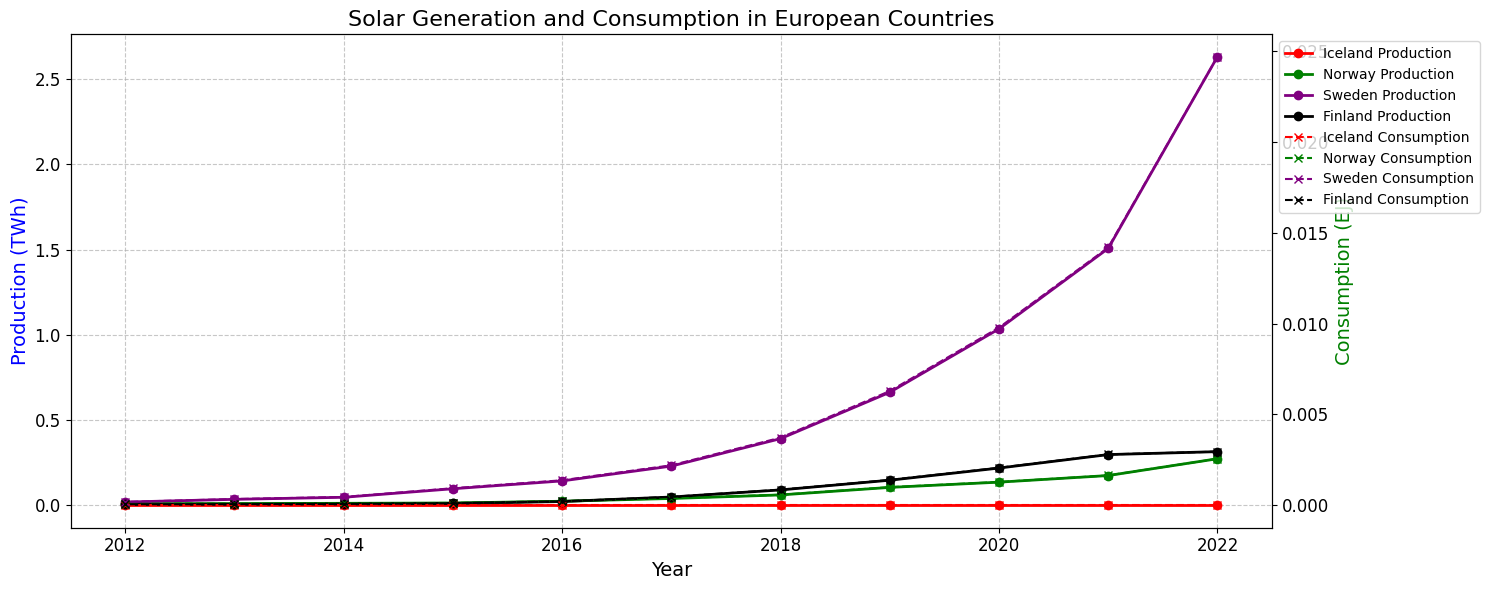

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
years = list(year_mapping.values())
ax1 = plt.gca()  # Primary y-axis for Production
ax2 = ax1.twinx()  # Secondary y-axis for Consumption

# Predefined colors for each country
colors = {
    'Iceland': 'red',
    'Norway': 'green',
    'Sweden': 'purple',
    'Finland': 'black'
}

# Plotting data
for country, color in colors.items():
    prod_data = european_data_prod[european_data_prod[country_column_prod] == country].iloc[0, 1:]
    cons_data = european_data_cons[european_data_cons[country_column_cons] == country].iloc[0, 1:]

    ax1.plot(years, prod_data, color=color, linewidth=2, marker='o', label=f'{country} Production')
    ax2.plot(years, cons_data, color=color, linestyle='--', marker='x', label=f'{country} Consumption')

# Labeling and titling
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Production (TWh)', color='blue', fontsize=14)
ax2.set_ylabel('Consumption (EJ)', color='green', fontsize=14)
ax1.set_title('Solar Generation and Consumption in European Countries', fontsize=16)

# Grid and aesthetics
ax1.grid(True, linestyle='--', which='both', alpha=0.7)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)


# Legend settings
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
